# Correlation Analysis

In [2]:
%cd ../..
from src.data.files import Data
from src.data.synthesizer import MachineSignalSynth, LinearSingleStep
import pandas as pd

/root/marching-penguin


In [3]:
all_events = Data.get_events()
tel = Data.get_telemetry()

In [4]:
machine_events = Data.seperate_by_machine(all_events)
machine_tel = Data.seperate_by_machine(tel)

In [ ]:
for machine_id in [94]:
    telemetry = machine_tel[machine_id]
    events = machine_events[machine_id]
    synthesizer = MachineSignalSynth(telemetry, events, LinearSingleStep())
    df = synthesizer.generate()
    #signal.head()

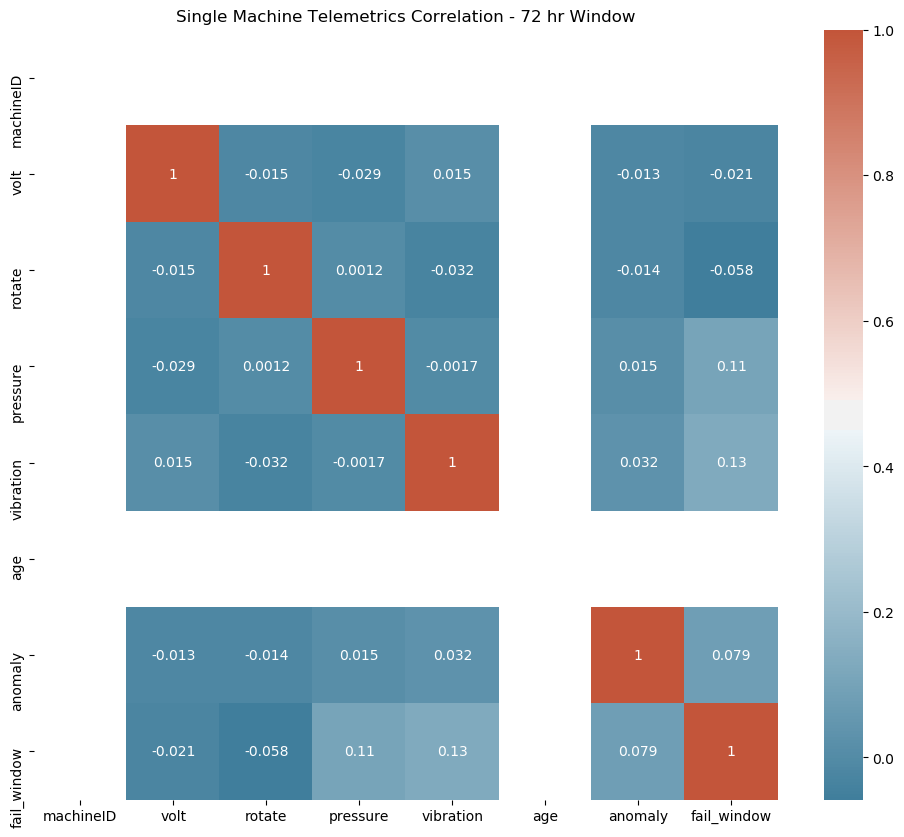

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Configure a custom diverging colormap
#|
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, cmap=cmap).set(title="Single Machine Telemetrics Correlation - 72 hr Window")
plt.show()

In [ ]:
df.loc[df["fail_window"] == True]

,datetime,machineID,volt,rotate,pressure,vibration,model,age,anomaly,fail_window
814773,2015-01-01 06:00:00,94,175.639054,407.501160,112.548513,42.085125,model2,18,False,True
814774,2015-01-01 07:00:00,94,166.829717,429.834792,100.544781,52.687612,model2,18,False,True
814775,2015-01-01 08:00:00,94,166.130186,409.435401,93.902270,47.811806,model2,18,False,True
814776,2015-01-01 09:00:00,94,169.926452,429.459831,87.409895,44.191322,model2,18,False,True
814777,2015-01-01 10:00:00,94,167.610602,496.288387,80.330525,41.370805,model2,18,False,True
...,...,...,...,...,...,...,...,...,...,...
823289,2015-12-22 02:00:00,94,130.812557,422.937359,104.276320,49.999604,model2,18,False,True
823290,2015-12-22 03:00:00,94,193.469948,550.338432,83.989501,44.915914,model2,18,False,True
823291,2015-12-22 04:00:00,94,204.131453,532.422030,93.115341,41.595076,model2,18,False,True
823292,2015-12-22 05:00:00,94,159.484030,443.444972,109.048303,34.683150,model2,18,False,True


In [ ]:
len(events.index)

8761